In [30]:
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install pandas

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
passmark = 40

In [57]:
import pandas as pd
df = pd.read_csv("/content/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,P,P,P,P


In [58]:
print (df.shape)

(1000, 12)


In [59]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [60]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
Math_PassStatus,0
Reading_PassStatus,0


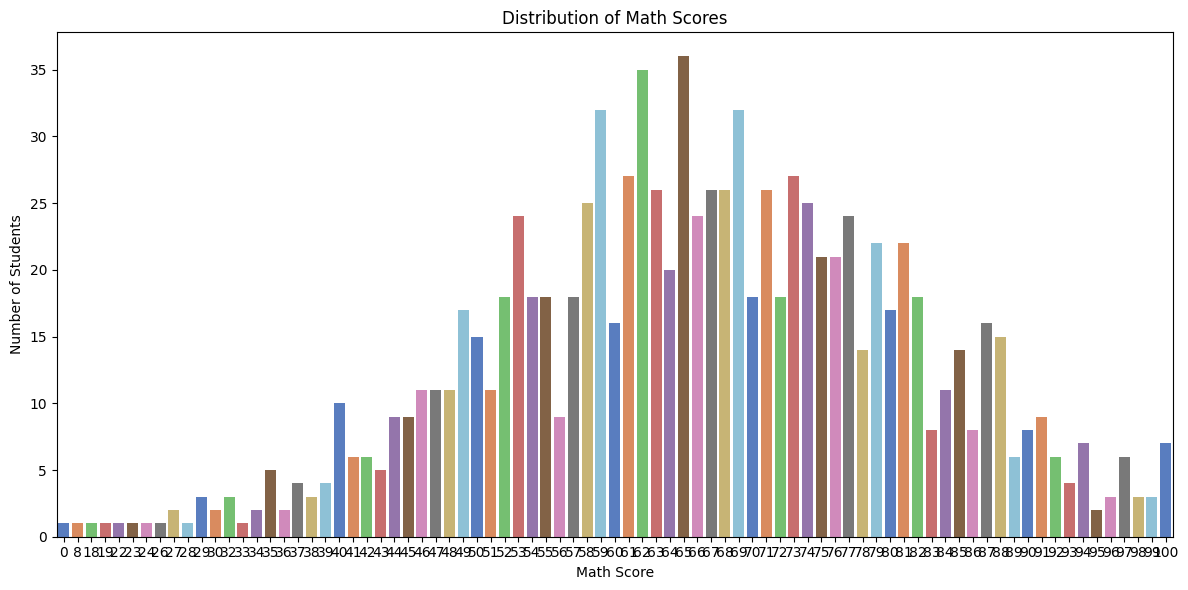

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/StudentsPerformance.csv")  # Ensure this file path is correct

# Create a count plot for math scores with updated usage of hue
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
p = sns.countplot(x="math score", data=df, hue="math score", palette="muted", legend=False)

# Set labels and title
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Math Scores')

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [62]:

passmark = 40
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

,count
Math_PassStatus,
P,960
F,40


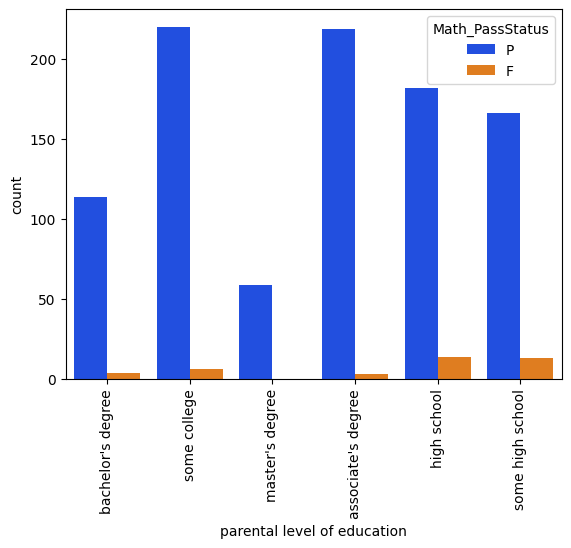

In [63]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

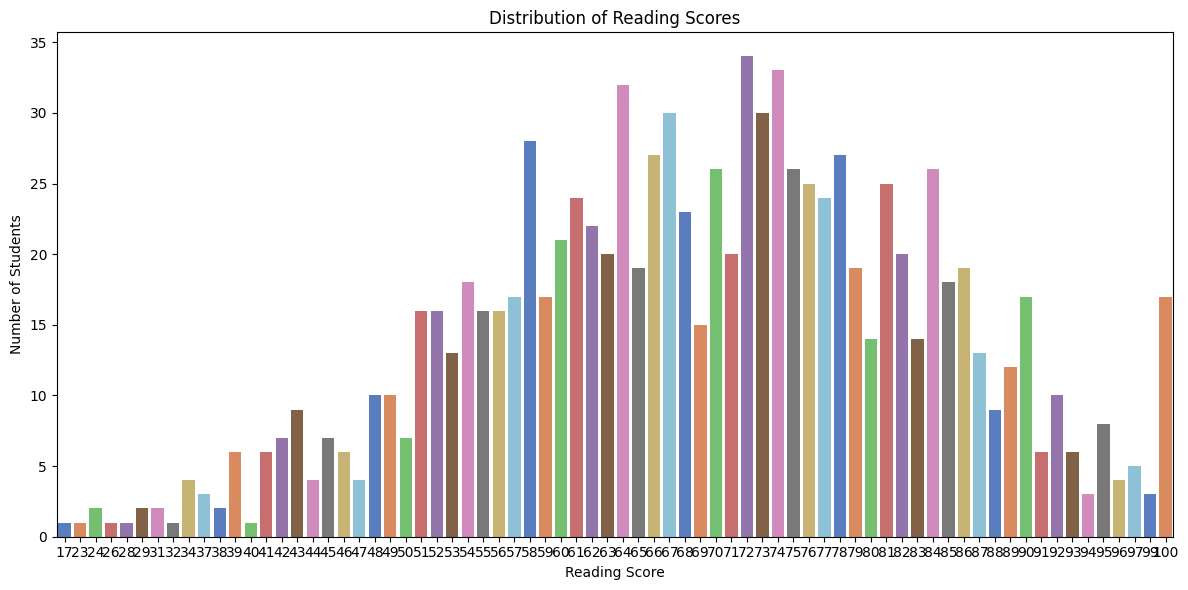

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/StudentsPerformance.csv")  # Ensure this file path is correct

# Create a count plot for reading scores with updated usage of hue
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
p = sns.countplot(x="reading score", data=df, hue="reading score", palette="muted", legend=False)

# Set labels and title
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Reading Scores')

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [65]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

,count
Reading_PassStatus,
P,974
F,26


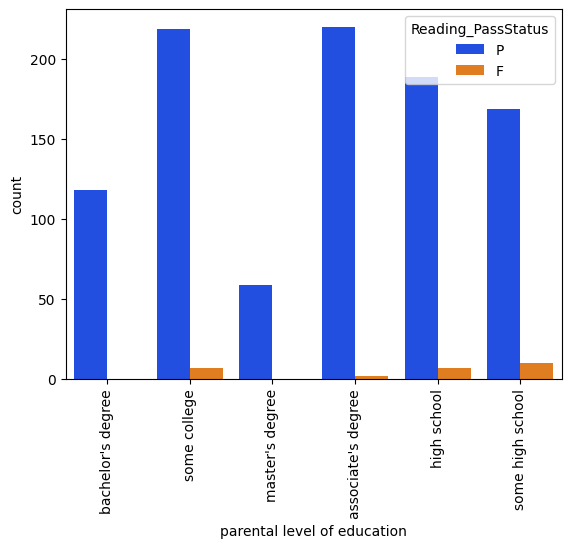

In [66]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

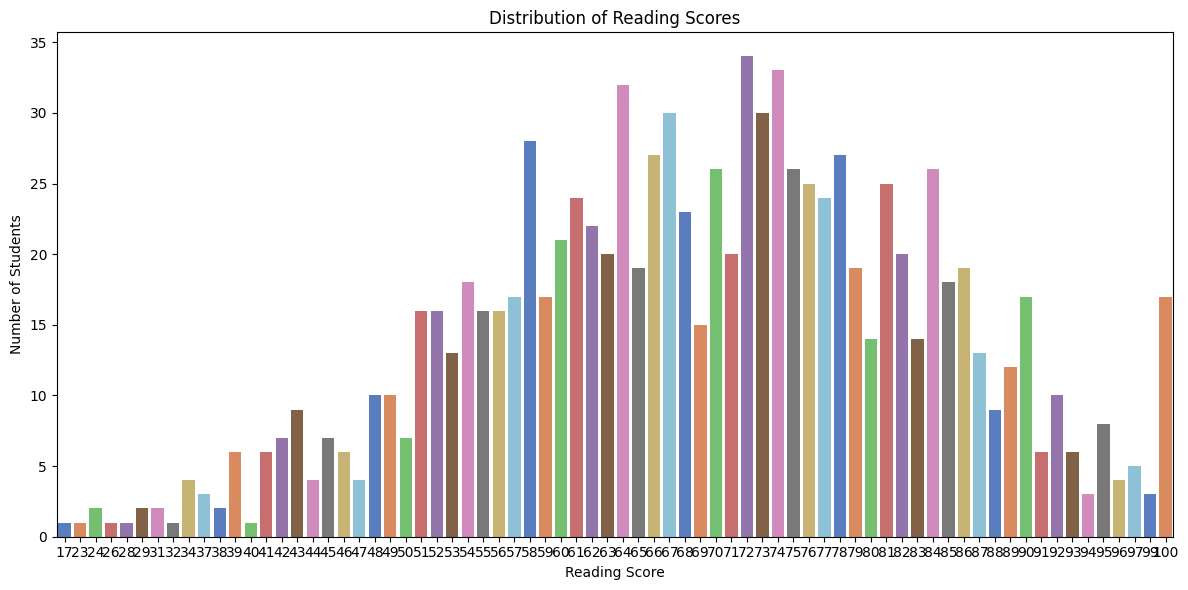

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/StudentsPerformance.csv")  # Ensure this file path is correct

# Create a count plot for reading scores with updated usage of hue
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
p = sns.countplot(x="reading score", data=df, hue="reading score", palette="muted", legend=False)

# Set labels and title
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Reading Scores')

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [68]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

,count
Reading_PassStatus,
P,974
F,26


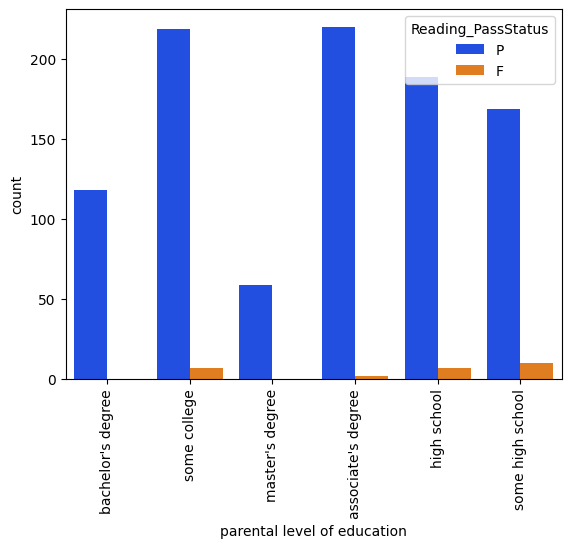

In [69]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)


In [70]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

,count
OverAll_PassStatus,
P,949
F,51


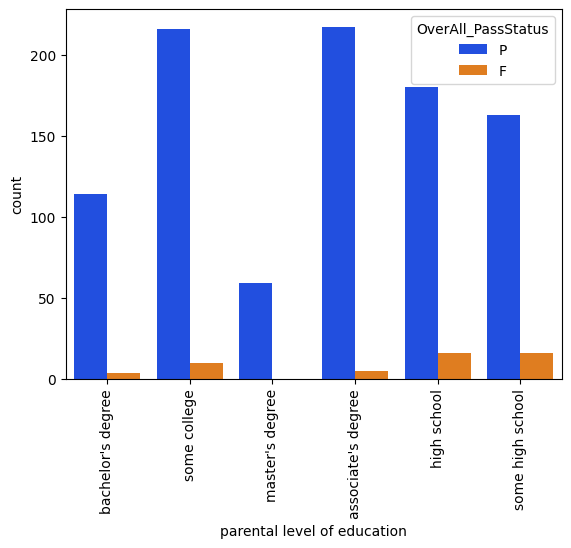

In [71]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

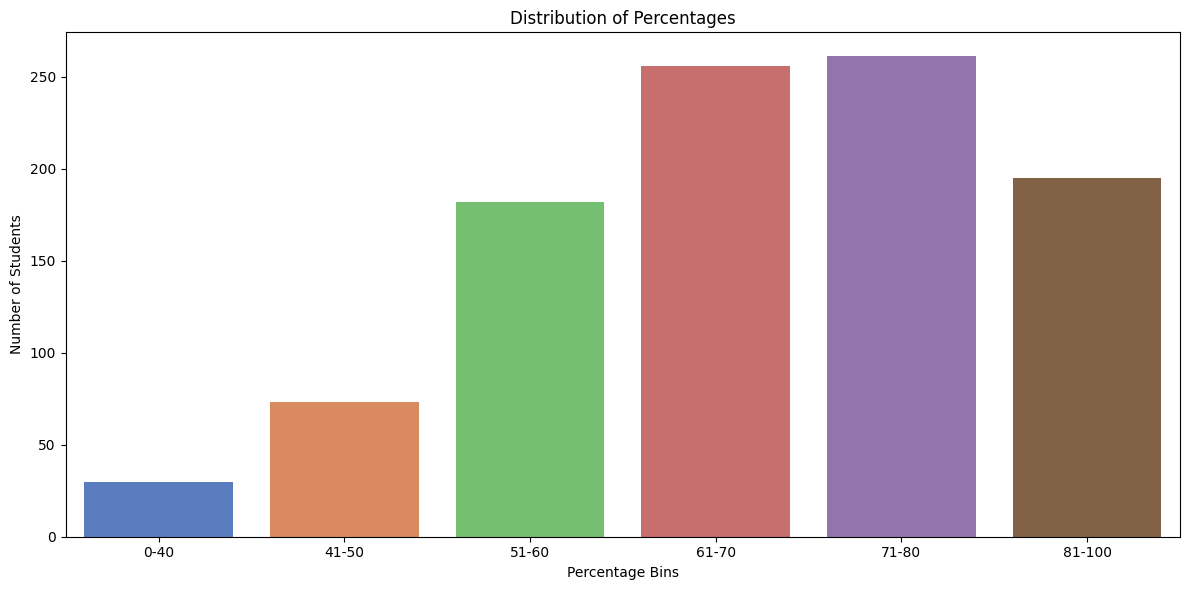

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/StudentsPerformance.csv")  # Ensure this file path is correct

# Calculate total marks and percentage
df['Total_Marks'] = df['math score'] + df['reading score'] + df['writing score']
df['Percentage'] = df['Total_Marks'] / 3

# Bin the percentages for better visualization
bins = [0, 40, 50, 60, 70, 80, 100]  # Define bins for percentages
labels = ['0-40', '41-50', '51-60', '61-70', '71-80', '81-100']  # Labels for the bins
df['Percentage_Binned'] = pd.cut(df['Percentage'], bins=bins, labels=labels, right=False)

# Create a count plot for binned percentages with updated usage of hue
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
p = sns.countplot(x="Percentage_Binned", data=df, hue="Percentage_Binned", palette="muted", legend=False)

# Set labels and title
plt.xlabel('Percentage Bins')
plt.ylabel('Number of Students')
plt.title('Distribution of Percentages')

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [73]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else:
        return 'F'
df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

,count
Grade,
B,261
C,256
A,198
D,178
E,56
F,51


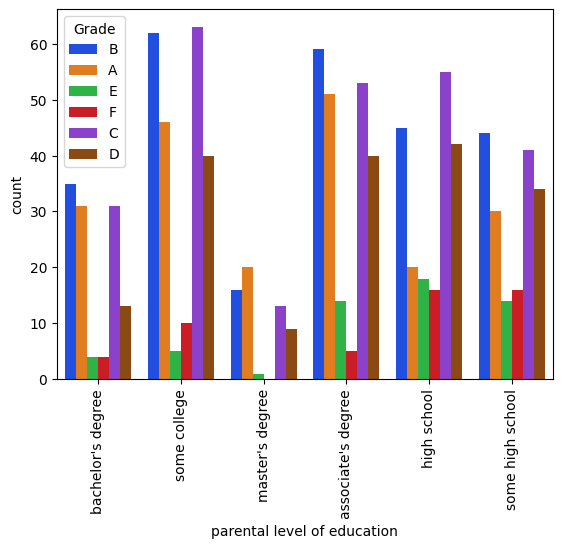

In [74]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)


In [75]:
!pip install scikit-learn

In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [77]:
import pandas as pd
df = pd.read_csv("/content/StudentsPerformance.csv")
df.head()
# Selecting features for clustering
features = df[['math score', 'reading score', 'writing score']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

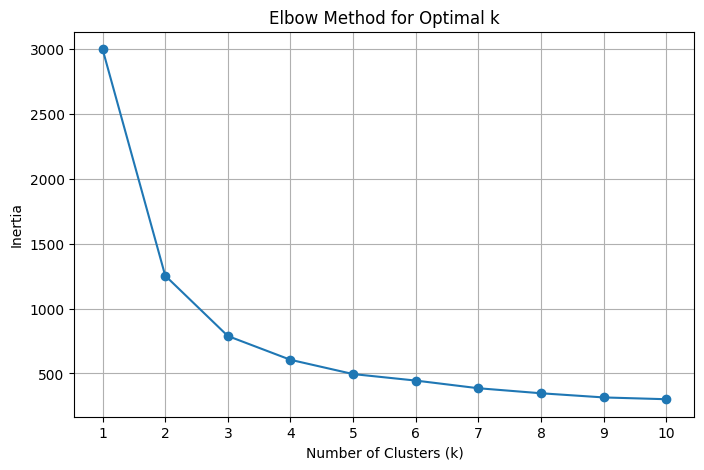

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/StudentsPerformance.csv")

# Select features for clustering
features = df[['math score', 'reading score', 'writing score']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculate the inertia for different numbers of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()


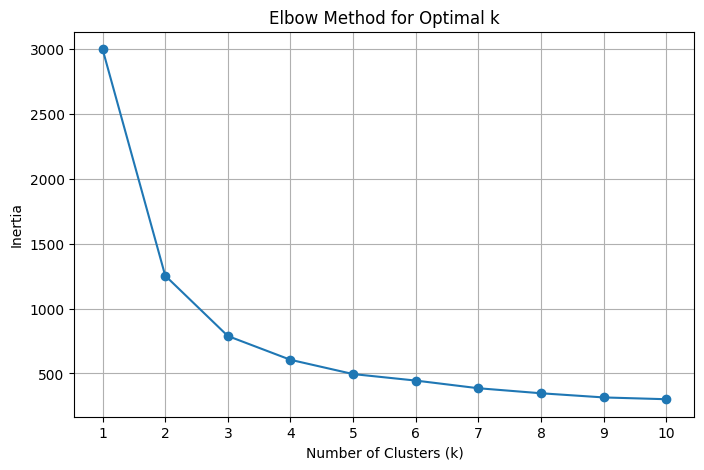

   math score  reading score  writing score  Cluster
0          72             72             74        0
1          69             90             88        2
2          90             95             93        2
3          47             57             44        1
4          76             78             75        2


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/StudentsPerformance.csv")

# Select features for clustering
features = df[['math score', 'reading score', 'writing score']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculate the inertia for different numbers of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

# Fit K-Means with the chosen number of clusters
k = 3  # Change this based on your elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Output the clustered DataFrame
print(df[['math score', 'reading score', 'writing score', 'Cluster']].head())


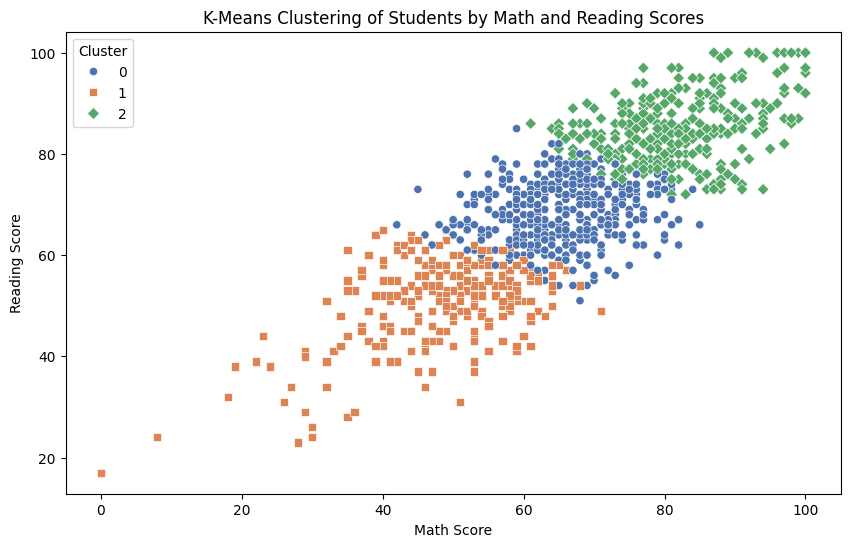

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns  # Ensure this line is included
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming you've done this already)
# df = pd.read_csv("StudentsPerformance (2).csv")

# Example: Selecting features and scaling
features = df[['math score', 'reading score', 'writing score']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fit K-Means clustering (example for k=3)
k = 3  # You can adjust this based on your elbow method results
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math score', y='reading score', hue='Cluster', palette='deep', style='Cluster', markers=["o", "s", "D"])
plt.title('K-Means Clustering of Students by Math and Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Cluster')
plt.show()


No missing values in the dataset.
Cluster distribution:
 Cluster
0    443
2    308
1    249
Name: count, dtype: int64


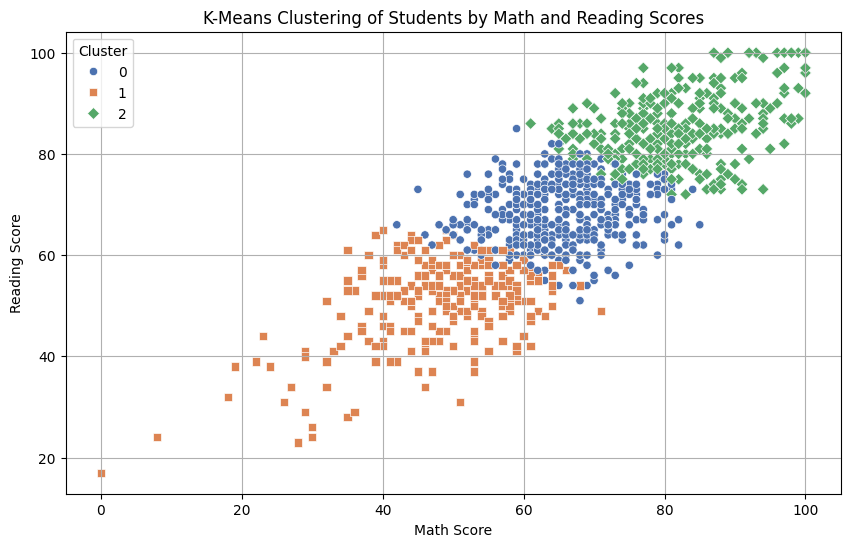


Cluster centroids:
    math score  reading score  writing score  Cluster
0   65.338600      68.458239      67.821670        0
1   48.096386      50.670683      48.485944        1
2   81.714286      85.146104      84.207792        2


In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/StudentsPerformance.csv")  # Ensure the correct file path

# Check for missing values and print basic info
if df.isnull().sum().any():
    print("Warning: Missing values found in the dataset.")
else:
    print("No missing values in the dataset.")

# Selecting features for clustering
features = df[['math score', 'reading score', 'writing score']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Fit K-Means clustering with optimal number of clusters
k = 3  # Adjust based on elbow method results
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Check cluster distribution
print("Cluster distribution:\n", df['Cluster'].value_counts())

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math score', y='reading score', hue='Cluster', palette='deep', style='Cluster', markers=["o", "s", "D"])
plt.title('K-Means Clustering of Students by Math and Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Displaying cluster centroids for interpretation
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=['math score', 'reading score', 'writing score'])
centroids_df['Cluster'] = range(k)
print("\nCluster centroids:\n", centroids_df)

